## Задача 2
Пусть $X_1, \ldots, X_n$ --- выборка из распределения
$\mathcal{N}(\theta,1)$. Построить (то есть, в том числе построить её график) функцию мощности критерия Стьюдента
проверки гипотезы $H_0: \theta=0$ уровня значимости $0.05$ для
$\theta\in[-10, 10]$, при нескольких различных значениях $n$. Как объяснить её изменения при растущих $n$?

Найти такое минимальное $n$, что при $|\theta_0-\theta_1|=1$ при
проверке гипотезы $H_0: \theta = \theta_0$ против альтернативы $H_1:
\theta=\theta_1$ критерием Стьюдента уровня значимости $0.05$
вероятность ошибки второго рода станет меньше вероятности ошибки
первого рода.

В этой задаче можно использовать циклы, но предпочтительной является конструкция [... for ... in ...] или аналогичная ей.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sklearn import cluster, datasets

### Критерий Стьюдента
Статистика критерия: $t(X) = \frac{\sqrt{n}(\overline{X} - \theta_0))}{s}$, где $s$ - выборочная дисперсия. В нашем случае, для $\theta_0 = 0$ $t(X)=\frac{\sqrt{n}\overline{X}}{s}$
Критерий против альтернативы $H_1:\overline{X} \neq \theta_0$ уровня значимости $\alpha$ - принимать гипотезу при $|t| \leq t_{\alpha/2}$, где $t_{\alpha/2}$ - $\alpha/2$-квантиль распределения Стьюдента с $n-1$ степенью свободы. 
Тогда функция мощности критерия Стьюдента $\beta(\theta) = P_\theta(t(X) \leq t_{\alpha/2})$, в нашем случае $\alpha = 0.05$

In [113]:
def test(X, a=0):
    n = len(X)
    t_X = np.sqrt(n) * (X.mean() - a)/ np.sqrt(X.var())
    t_a = sps.t.ppf(q=1-0.025, df=n-1)
    return np.abs(t_X) > t_a

def plot_power_function(theta_set, n_set, checks=100):
    plt.figure(figsize=(10, 5))

    for n in n_set:
        power_function = np.full(len(theta_set), 0.0)
        k = 0
        for theta in theta_set:
            count = 0
            for i in range(checks):
                X = sps.norm.rvs(size=n, loc=theta)
                count += int(test(X))
            power_function[k] = count
            k += 1
        power_function /= checks
        plt.plot(theta_set, power_function, label=f"n = {n}")


    plt.title('Функции мощности критерия Стьюдента')
    plt.xlabel("$\\theta$")
    plt.ylabel("Значение функции мощности")
    plt.legend()
    plt.show()

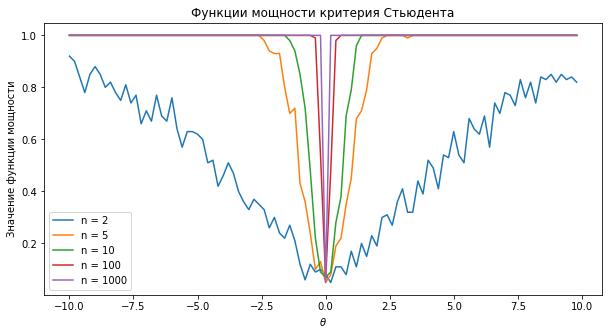

In [114]:
plot_power_function(theta_set=np.arange(-10, 10, 0.2), n_set=[2, 5, 10, 100, 1000])

#### Наблюдения
Графики получились "рваными" - мы бы хотели ожидать, что они будут гладкими. Наверняка так и есть, а такое поведение обсуловлено тем, что вероятность ошибки второго рода мы определяем, запустив критерий много раз и посчитав, сколько из них он ошибется. Тогда будем ожидать, что графики получатся гладкими, если мы проведем больше проверок. Убедимся:

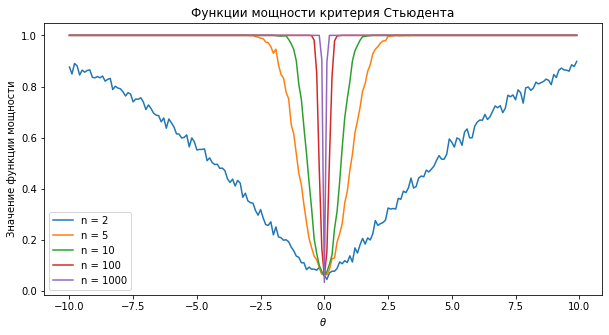

In [115]:
plot_power_function(theta_set=np.arange(-10, 10, 0.1), n_set=[2, 5, 10, 100, 1000], checks=1000)

#### Наблюдения
Критерий тем мощнее, чем больше выборка. Так, для выборки из двух элементов критерий принимает неверную гипотезу для всех $|\theta| \leq 10$. Для выборки же из 1000 элементов, ошибки второго рода перестают происходить при $|\theta|$ заметно меньших 1. Взглянем поближе на происходящее в окрестности $\theta = 0$:

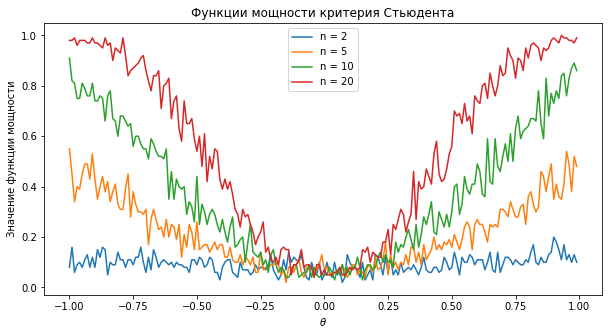

In [116]:
plot_power_function(theta_set=np.arange(-1, 1, 0.01), n_set=[2, 5, 10, 20])

Заметим, что графики проходят через точку 0.05 при $\theta = 0$ - в этой точке достигается минимум функции мощности, потому что при любой выборке идеальный критерий должен бы давать ноль. Наш же критерий даст нам наш уровень значимости - именно поэтому чем он меньше, тем лучше. Убедимся наверняка: взглянем еще ближе.

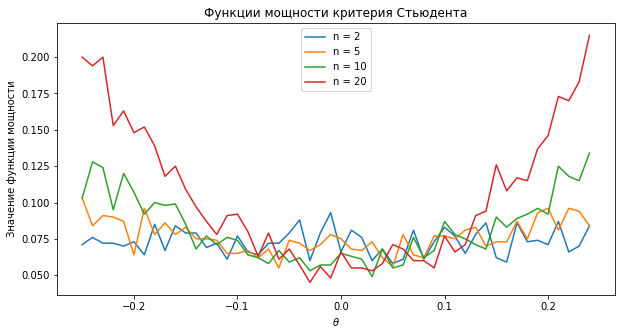

In [118]:
plot_power_function(theta_set=np.arange(-0.25, 0.25, 0.01), n_set=[2, 5, 10, 20], checks=1000)

Как мы уже предположили и даже подтвердили опытом, скачки графиков от неидеального подсчета вероятностей. Тем не менее, в таком масштабе видно, что графики действительно достаточно близки к точке 0.05 - но не ниже.

### Часть 2
Найдем теперь минимальное $n$, что при $|\theta_0-\theta_1|=1$ при
проверке гипотезы $H_0: \theta = \theta_0$ против альтернативы $H_1:
\theta=\theta_1$ критерием Стьюдента уровня значимости $0.05$
вероятность ошибки второго рода станет меньше вероятности ошибки
первого рода. 

Чтобы оценить вероятности ошибок, просто запустим проверку критерия много раз, и посмотрим, какие ошибки чаще происходят. Несмотря на то, что выбор конкретных $\theta_{0,1}$  не должен ни на что влиять, переберем на всякий случай разные - чтобы убедиться.

In [140]:
def find_min_n(theta_0, theta_1, checks=1000):
    for n in range(2, 20):
        first = 0
        second = 0
        for i in range(checks):
            X = sps.norm.rvs(loc=theta_0, size=n)
            # отвергается верная гипотеза 
            first += int(test(X, a=theta_0))
            # принимается неверная
            second += 1 - int(test(X, a=theta_1))
        if second < first:
            print('Min n = ', n, 'first type mistake chance = ', first / checks)
            break

In [142]:
find_min_n(theta_0=0, theta_1=1)
find_min_n(theta_0=-1, theta_1=0)
find_min_n(theta_0=-0.5, theta_1=0.5)

Min n =  15 first type mistake chance =  0.058
Min n =  14 first type mistake chance =  0.063
Min n =  14 first type mistake chance =  0.061


То есть при размере выборки порядка 20 шанс обоих ошибок будет менее 0.065, что весьма неплохо. Скорее всего, он будет еще меньше, считай мы вероятности точнее. 
## Вывод
Критерий Стьюдента позволяет оценить нашу догадку относительно матожидания нормального распределения. Чем дальше наша догадка от реального значения, тем реже критерий совершает ошибки второго рода, чего от него и хотелось бы. Что естественно, чем больше выборка, тем точнее мы можем сказать, хорошая ли догадка. Но, как мы увидели во второй части, выборки сравнительно небольшого размера - 20 в нашем случае - вполне хватает. 